In [27]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
    
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [28]:
# Load the dataset in Python and drop N/A values to make plot function calls simpler
# Use seaborn github dataset: ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)
# Load dataset locally
ti = pd.read_csv('../data/titanic-seaborn.csv').dropna().reset_index(drop=True)
# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
# df_interact(ti)

In [29]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [30]:
%%R
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
install.packages("shape", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)
library(shape)

In [31]:
%%R
# Load the dataset in R and drop N/A values to make plot function calls simpler
ti <- read.csv("../data/titanic-seaborn.csv", header = TRUE, sep=",")
# Delete rows with empty values
# Source: https://stackoverflow.com/questions/9126840/delete-rows-with-blank-values-in-one-particular-column
ti <- ti[!(is.na(ti$survived) | is.na(ti$pclass) | ti$deck=="" |
           ti$sex=="" | is.na(ti$age) | is.na(ti$sibsp) | is.na(ti$parch) |
           is.na(ti$fare) | ti$class=="" | ti$who=="" | ti$embarked=="" |
           ti$adult_male=="" |  ti$embark_town==""), ] 

# Calculate confidence interval: https://www.cyclismo.org/tutorial/R/confidence.html
ci <- function(x) {
    qnorm(0.975)*sd(x)/sqrt(length(x))
}

# Plot only text
# Source: https://stackoverflow.com/a/19920666/12347616
ptext <- function(text) {
    out <- toString(text)
    par(mar = c(0,0,0,0))
    plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
    text(x = 0.5, y = 0.5, paste(out), cex = 1.6, col = "black")
    par(mar = c(5, 4, 4, 2) + 0.1)
}

Although seaborn allows us to quickly create many types of plots, it does not give us fine-grained control over the chart. For example, we cannot use seaborn to modify a plot's title, change x or y-axis labels, or add annotations to a plot. Instead, we must use the matplotlib library that seaborn is based off of.

matplotlib provides basic building blocks for creating plots in Python. Although it gives great control, it is also more verbose—recreating the seaborn plots from the previous sections in matplotlib would take many lines of code. In fact, we can think of seaborn as a set of useful shortcuts to create matplotlib plots. Although we prefer to prototype plots in seaborn, in order to customize plots for publication we will need to learn basic pieces of matplotlib.

Before we look at our first simple example, we must activate matplotlib support in the notebook:

In [32]:
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

#### Customizing Figures and Axes 
In order to create a plot in matplotlib, we create a figure, then add an axes to the figure. In matplotlib, an axes is a single chart, and figures can contain multiple axes in a tablular layout. An axes contains marks, the lines or patches drawn on the plot.

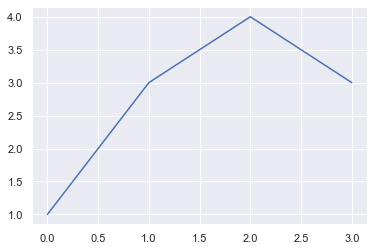

In [33]:
# Create a figure
f = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1)

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

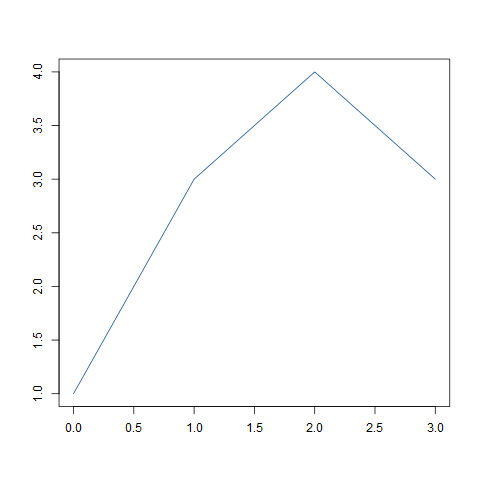

In [34]:
%%R
plot(c(0, 1, 2, 3), c(1, 3, 4, 3), type="l", col="dodgerblue4", , xlab="", ylab="")

To customize the plot, we can use other methods on the axes object:

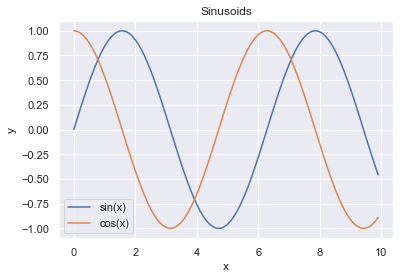

In [35]:
f = plt.figure()
ax = f.add_subplot(1, 1, 1)

x = np.arange(0, 10, 0.1)

# Setting the label kwarg lets us generate a legend
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend()

ax.set_title('Sinusoids')
ax.set_xlabel('x')
ax.set_ylabel('y');

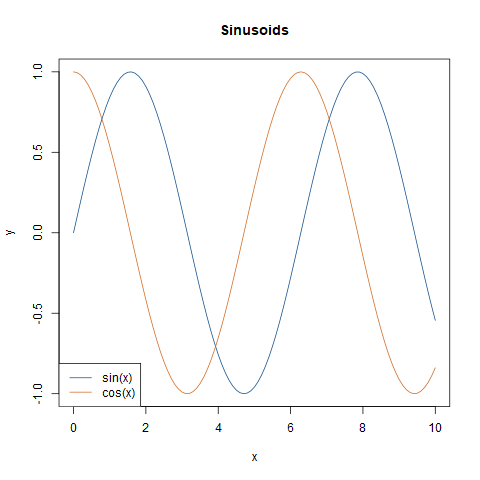

In [36]:
%%R
# Sine in R: https://rstudio-pubs-static.s3.amazonaws.com/110183_06adc5f01fc940f98fdc0822ac408de0.html
x=seq(0,10,0.1)
plot(x, sin(x), main="Sinusoids", type="l", col="dodgerblue4", xlab="x", ylab="y")
lines(x, cos(x), col="chocolate")
legend(x="bottomleft", legend=c("sin(x)", "cos(x)"), col=c("dodgerblue4", "chocolate"), lty=1)

As a shortcut, matplotlib has plotting methods on the plt module itself that will automatically initialize a figure and axes.

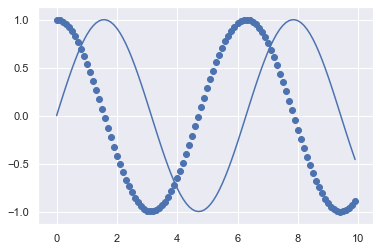

In [37]:
# Shorthand to create figure and axes and call ax.plot
plt.plot(x, np.sin(x))

# When plt methods are called multiple times in the same cell, the
# existing figure and axes are reused.
plt.scatter(x, np.cos(x));

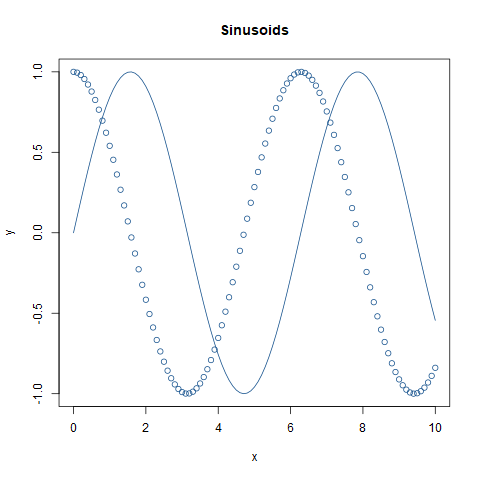

In [38]:
%%R
x=seq(0,10,0.1)
plot(x, sin(x), main="Sinusoids", type="l", col="dodgerblue4", xlab="x", ylab="y")
points(x, cos(x), col="dodgerblue4")

The `plt` module has analogous methods to an axes, so we can recreate one of the plots above using `plt` shorthands.

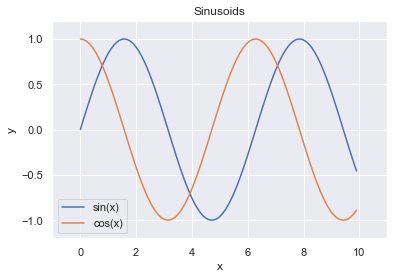

In [39]:
x = np.arange(0, 10, 0.1)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

# Shorthand for ax.set_title
plt.title('Sinusoids')
plt.xlabel('x')
plt.ylabel('y')

# Set the x and y-axis limits
plt.xlim(-1, 11)
plt.ylim(-1.2, 1.2);

#### Customizing Marks 
To change properties of the plot marks themselves (e.g. the lines in the plot above), we can pass additional arguments into plt.plot.

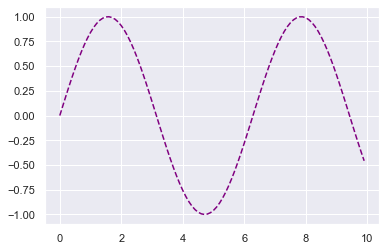

In [40]:
plt.plot(x, np.sin(x), linestyle='--', color='purple');

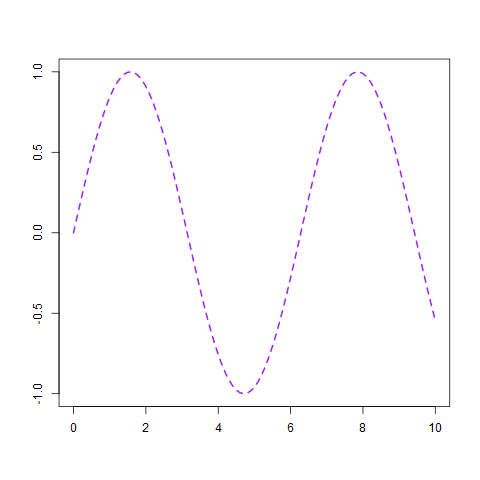

In [41]:
%%R
x=seq(0,10,0.1)
plot(x, sin(x), type="l", lty=2, lwd=2, col="purple", xlab="", ylab="")

Checking the matplotlib documentation is the easiest way to figure out which arguments are available for each method. Another way is to store the returned line object:

In [1]: line, = plot([1,2,3])

These line objects have a lot of properties you can control.

### Aribitrary text and LaTeX support 
In matplotlib, text can be added either relative to an individual axis object or to the whole figure.

These commands add text to the Axes:

* set_title() - add a title
* set_xlabel() - add an axis label to the x-axis
* set_ylabel() - add an axis label to the y-axis
* text() - add text at an arbitrary location
* annotate() - add an annotation, with optional arrow

And these act on the whole figure:

* figtext() - add text at an arbitrary location
* suptitle() - add a title

And any text field can contain LaTeX expressions for mathematics, as long as they are enclosed in $ signs.

This example illustrates all of them:

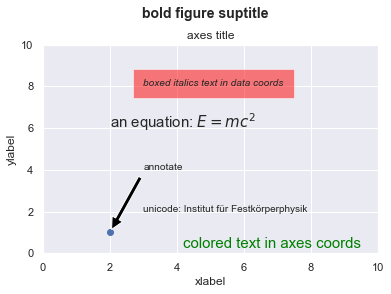

In [42]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);

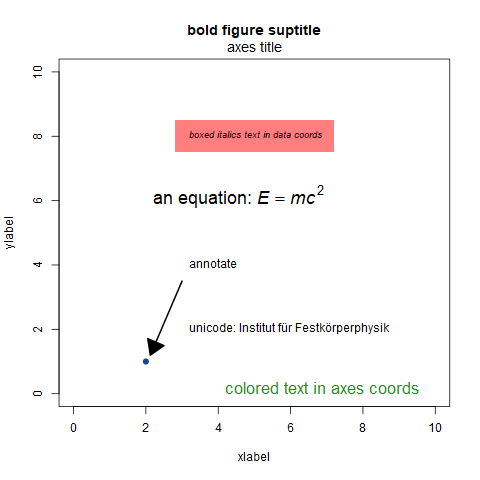

In [43]:
%%R
# Add test to plot: https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/text.html
# Use function italic: https://stackoverflow.com/a/16659354/12347616 ,
# https://stackoverflow.com/a/18965719/12347616
# Draw rect: https://www.math.ucla.edu/~anderson/rw1001/library/base/html/rect.html
# Arrows package: https://stackoverflow.com/a/47603255/12347616
# Axes title: https://stackoverflow.com/a/44618277/12347616 ,
# https://stackoverflow.com/a/7121951/12347616
plot(2, 1, pch=19, col="dodgerblue4", xlim=c(0, 10), ylim=c(0, 10),
    xlab="xlabel", ylab="ylabel", main="bold figure suptitle")
text(2, 6, pos=4, expression(paste("an equation: ", italic(E==mc^2))), cex=1.5)
text(3, 2, pos=4, "unicode: Institut für Festkörperphysik")
rect(2.8, 7.5, 7.2, 8.5, col=adjustcolor( "red", alpha.f = 0.5), border=NA)
text(3, 8, pos=4, expression(italic("boxed italics text in data coords")), cex=0.75)
Arrows(3, 3.5, 2.2, 1.4, lwd=2, arr.type="triangle", arr.width=0.5)
text(3, 4, pos=4, "annotate")
text(4, 0.1, pos=4, col="forestgreen", "colored text in axes coords", cex=1.4)
title("axes title", adj = 0.5, line = +0.5, font.main = 1)

#### Customizing a seaborn plot using matplotlib 
Now that we've seen how to use matplotlib to customize a plot, we can use the same methods to customize seaborn plots since seaborn creates plots using matplotlib behind-the-scenes.

In [44]:
# Load seaborn
import seaborn as sns
sns.set()
sns.set_context('talk')

# Load dataset
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)
ti.head()

,survived,pclass,sex,age,...,deck,embark_town,alive,alone
0,1,1,female,38.0,...,C,Cherbourg,yes,False
1,1,1,female,35.0,...,C,Southampton,yes,False
2,0,1,male,54.0,...,E,Southampton,no,True
3,1,3,female,4.0,...,G,Southampton,yes,False
4,1,1,female,58.0,...,C,Southampton,yes,True


We'll start with this plot:

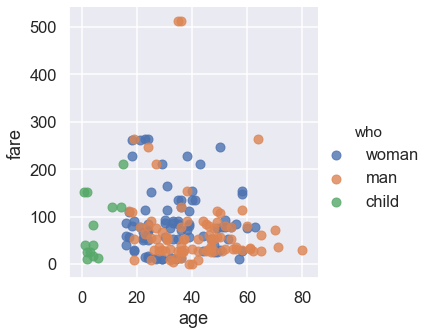

In [45]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False);

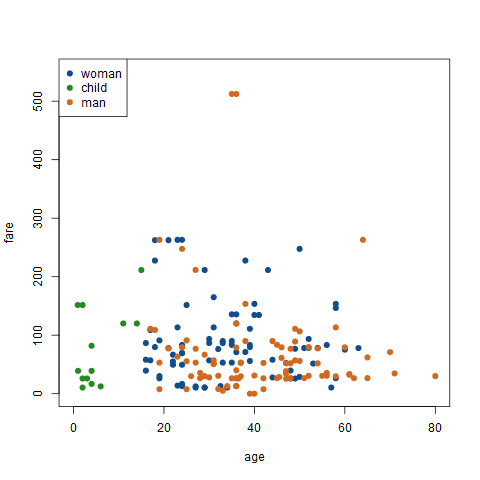

In [46]:
%%R
plot(ti$age[ti$who=="woman"], ti$fare[ti$who=="woman"], xlab="age", ylab="fare",
    xlim=c(0, 80), ylim=c(0, 550), col = c("dodgerblue4"), pch=19
)
points(ti$age[ti$who=="child"], ti$fare[ti$who=="child"], xlab="age", ylab="fare",
    col = c("forestgreen"), pch=19
)
points(ti$age[ti$who=="man"], ti$fare[ti$who=="man"], xlab="age", ylab="fare",
    col = c("chocolate"), pch=19
)
# Add legend: http://www.sthda.com/english/wiki/add-legends-to-plots-in-r-software-the-easiest-way ,
# https://stackoverflow.com/a/19054155
legend(x="topleft", legend=c("woman", "child", "man"), col=c("dodgerblue4", "forestgreen", "chocolate"),  pch=19)

We can see that the plot needs a title and better labels for the x and y-axes. In addition, the two people with the most expensive fares survived, so we can annotate them on our plot.

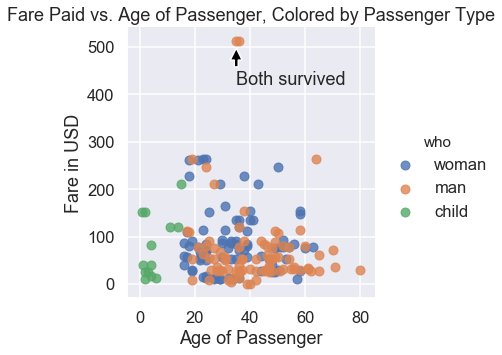

In [47]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False)

plt.title('Fare Paid vs. Age of Passenger, Colored by Passenger Type')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

plt.annotate('Both survived', xy=(35, 500), xytext=(35, 420),
             arrowprops=dict(facecolor='black', shrink=0.05));

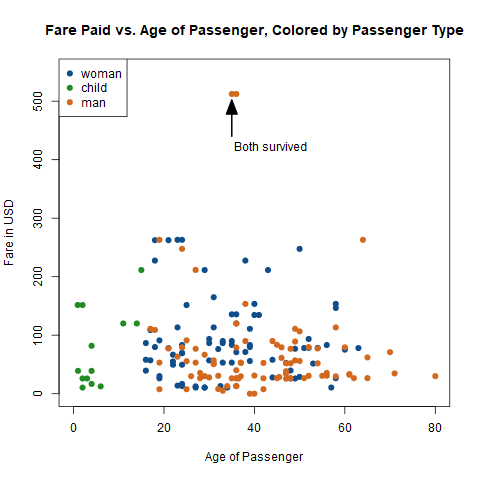

In [48]:
%%R
plot(ti$age[ti$who=="woman"], ti$fare[ti$who=="woman"], xlab="Age of Passenger", ylab="Fare in USD", 
    main="Fare Paid vs. Age of Passenger, Colored by Passenger Type", xlim=c(0, 80), ylim=c(0, 550), 
    col = c("dodgerblue4"), pch=19
)
points(ti$age[ti$who=="child"], ti$fare[ti$who=="child"], xlab="age", ylab="fare",
    col = c("forestgreen"), pch=19
)
points(ti$age[ti$who=="man"], ti$fare[ti$who=="man"], xlab="age", ylab="fare",
    col = c("chocolate"), pch=19
)
Arrows(35, 440, 35, 490, lwd=2, arr.type="triangle", arr.width=0.3)
text(34, 420, pos=4, "Both survived")
legend(x="topleft", legend=c("woman", "child", "man"), col=c("dodgerblue4", "forestgreen", "chocolate"),  pch=19)

In practice, we use seaborn to quickly explore the data and then turn to matplotlib for fine-tuning once we decide on the plots to use in a paper or presentation.